# Визуализация данных в Matplotlib

Примеры взяты из книги [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do)

[`Matplotlib`](https://matplotlib.org/) — библиотека для визуализации данных. Пакет поддерживает многие виды графиков и диаграмм:
- Графики (line plot)
- Диаграммы разброса (scatter plot)
- Столбчатые диаграммы (bar chart) и гистограммы (histogram)
- Круговые диаграммы (pie chart)
- и др.

## Содержание
- [Настройка стиля](#Настройка стиля)   
- [Простой график](#Простой график)
- [Объектно-ориентированный интерфейс](#Объектно-ориентированный интерфейс)
- [Scatter plot](#Scatter plot)
- [Contour](#Contour)
- [Несколько графиков](#Несколько графиков)
- [3D](#3D)

Импорт библиотеки

In [2]:
import matplotlib.pyplot as plt

# эта магическая команда позволяет отрисовывать графики интерактивно
%matplotlib inline 

# <a id="Настройка стиля"><span style="color:green"> Настройка стиля</span></a>
[Подбробнее о настроке стиля](https://matplotlib.org/users/style_sheets.html)

Доступные стили

In [2]:
print(plt.style.available)

['seaborn-notebook', 'classic', '_classic_test', 'seaborn-bright', 'seaborn-darkgrid', 'seaborn-colorblind', 'seaborn-pastel', 'dark_background', 'seaborn-poster', 'seaborn', 'fast', 'seaborn-dark', 'seaborn-whitegrid', 'Solarize_Light2', 'seaborn-dark-palette', 'fivethirtyeight', 'grayscale', 'seaborn-paper', 'ggplot', 'seaborn-deep', 'seaborn-muted', 'seaborn-talk', 'tableau-colorblind10', 'seaborn-ticks', 'bmh', 'seaborn-white']


In [3]:
plt.style.use('seaborn-dark-palette')

# <a id="Простой график"><span style="color:green"> Простой график</span></a>

- MatLab стиль (процедурный)

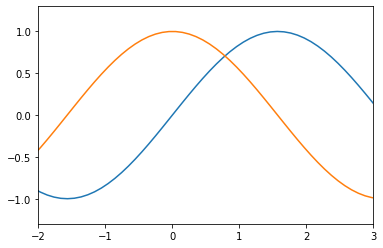

In [21]:
import numpy as np
x = np.linspace(-5, 5, 100)

# границы рисовки
plt.xlim(-2, 3)
plt.ylim(-1.3, 1.3)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

- Объекто-ориентированный стиль

Здесь стоит обратить внимение, что все измненения графика применятся к "активному" рисунку, то есть тому который вы только что создали, поэтому чтобы была возможность управлять стилями, наполнением и офрмлением каждого отельного рисунка, он создается как объект, состоящий из рисунка (`figure`) и осей (`axis`). Для этих объектов определены различные методы.

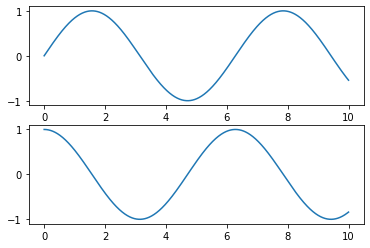

In [11]:
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

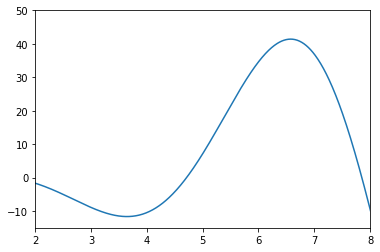

In [15]:
ax = plt.axes()

# еще один способ задания границ рисунка 
# plt.axis([xmin, xmax, ymin, ymax])
ax.axis([2, 8, -15, 50])
x = np.linspace(0, 10, 1000)
ax.plot(x, np.cos(x) * x**2);

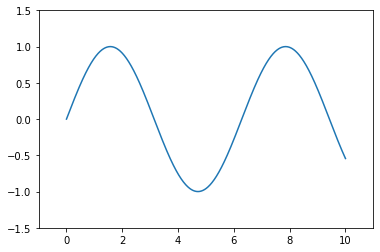

In [16]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

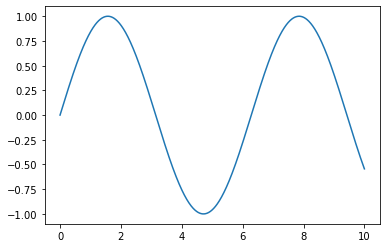

In [17]:
plt.plot(x, np.sin(x))
plt.axis('tight');

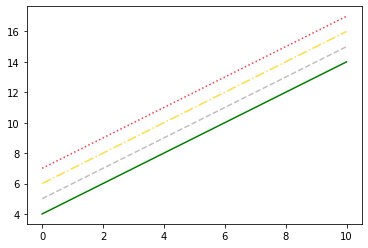

In [19]:
plt.plot(x, x + 4, linestyle='-', color='g')   
plt.plot(x, x + 5, linestyle='--', color='0.75')  
plt.plot(x, x + 6, linestyle='-.', color='#FFDD44') 
plt.plot(x, x + 7, linestyle=':', color=(1.0,0.2,0.3)); 

# <a id="Scatter plot"><span style="color:green">Scatter plot</span></a>

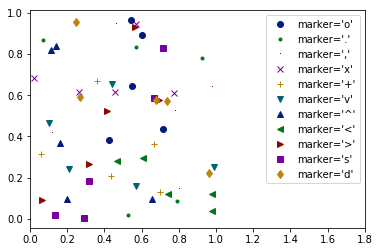

In [12]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

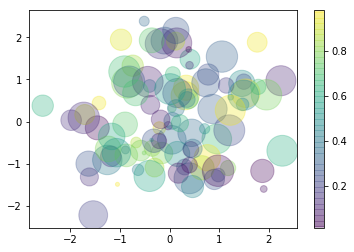

In [13]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)

colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale

# <a id="Contour"><span style="color:green">Contour</span></a>

In [14]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [15]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

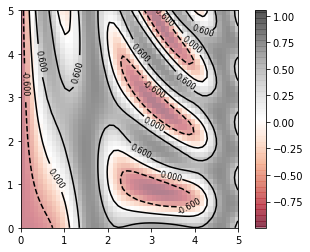

In [16]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar();

# <a id="Несколько графиков"><span style="color:green">Несколько графиков</span></a>

Создание трех графиков: сетка 2 на 3

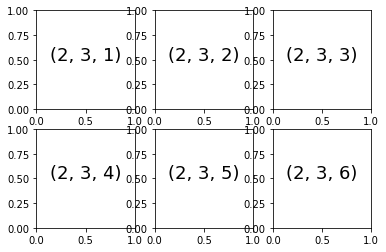

In [20]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

Чтобы выйти за рамки обычной сетки на вложенные диаграммы, охватывающие несколько строк и столбцов, `plt.GridSpec()` - лучший инструмент. Объект `GridSpec()` не создает участок сам по себе; это просто удобный интерфейс, который распознается plt.subplot (). Например, gridspec для сетки из двух строк и трех столбцов с определенной шириной и высотой выглядит следующим образом:

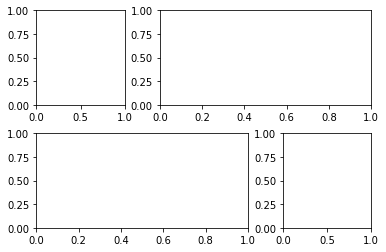

In [19]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

# <a id="3D"><span style="color:green">3D</span></a>

In [20]:
from mpl_toolkits import mplot3d

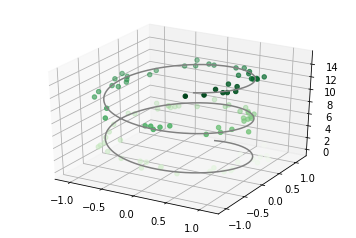

In [21]:
ax = plt.axes(projection='3d')

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [22]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

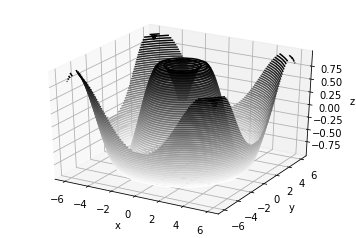

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Иногда угол обзора по умолчанию не является оптимальным, и в этом случае мы можем использовать метод `view_init`. В следующем примере мы будем использовать высоту 60 градусов (то есть 60 градусов над плоскостью x-y) и поворот 35 градусов (то есть поворот на 35 градусов против часовой стрелки вокруг оси z):

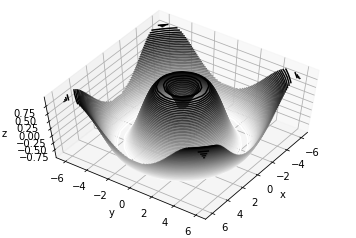

In [24]:
ax.view_init(60, 35)
fig